In [1]:
from fully_random_mirror_benchmarking import FullyRandomMB_Experiment

from selene_sim import DepolarizingErrorModel, Stim, Quest
from selene_custom_error_model import (
    BasicErrorModel,
    OneQubitErrorRates,
    TwoQubitErrorRates,
)

In [2]:
# select parameters and build experiment

n_qubits = 98
seq_lengths = [4, 8, 12] # half of circuit depth

exp = FullyRandomMB_Experiment(n_qubits, seq_lengths)
exp.options['SQ_type'] = 'Clifford' # or 'Clifford+T'
exp.add_settings()

In [3]:
# setup error model

error_model = DepolarizingErrorModel(
    #random_seed=1234,
    # single qubit gate error rate
    #p_1q=3e-5,
    # two qubit gate error rate
    p_2q=7e-4,
    # set state preparation and measurement error rates to 0
    p_meas=0,
    p_init=0,
)

In [4]:
shots = 500
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/3 circuits complete
2/3 circuits complete
3/3 circuits complete


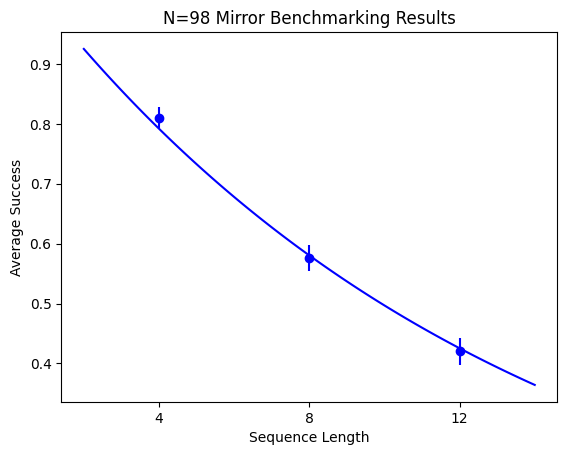

Success Probabilities
----------------------
4: 0.81 +/- 0.0175
8: 0.576 +/- 0.0221
12: 0.42 +/- 0.0221

Max circuit depth with survival > 2/3: 14

TQ Average Fidelity (for depolarizing error) = 0.9994 +/- 0.0


In [5]:
exp.analyze_results()

In [10]:
exp.filename = 'exp_fully_random_MB_test.p'
exp.save()

In [2]:
import pickle

exp = pickle.load(open('exp_fully_random_MB_test.p', 'rb'))